In [1]:
# °°° Import datas from Binance °°°

import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot
import cufflinks as cf
import binance

client = binance.Client()
data = client.get_historical_klines('BTCBUSD', client.KLINE_INTERVAL_4HOUR, '14-Dec-2021', '14-Dec-2022')
for i in range(0, len(data)):
    for j in range(0,11):
        data[i][j] = float(data[i][j])
for line in data:
    del line[2:4]
    del line[2:]

pd.options.display.max_rows = 999999
data = pd.DataFrame(data,columns = ['Date','Close'])
data['Date'] = pd.to_datetime(data['Date'], unit = 'ms',utc = True).map(lambda x:x.tz_convert('Europe/Rome'))
data.set_index('Date', inplace = True)

In [2]:
# BB use a SMA, so we must define a SMA firstly

def SMA(array, period):
    
    return array.rolling(period).mean()

# °°° BOLLINGER BANDS functions °°°

def BBL(array, period, k):
    
    BB1 = SMA(array, period) - k * array.rolling(period).std()
    
    return BB1

def BBU(array, period, k):
    
    BB2 = SMA(array, period) + k * array.rolling(period).std()
    
    return BB2

In [3]:
# Define BBs (SMA = 15 ; st. dev. = 2.0)

data["SMA15"] = SMA(data.Close, 20)
data["BBU15"] = BBU(data.Close, 15, 2.0)
data["BBL15"] = BBL(data.Close, 15, 2.0)

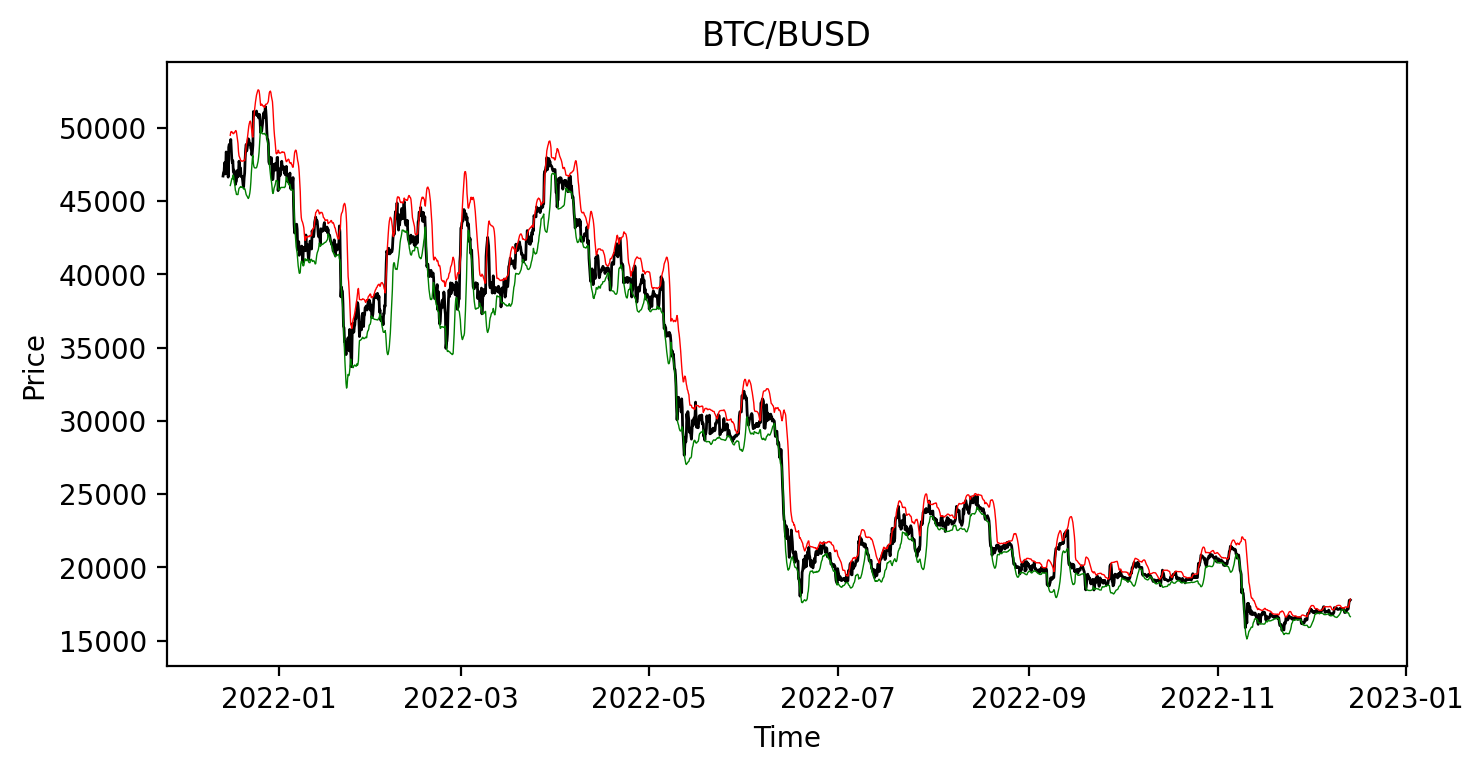

In [4]:
# Grapich visualization

plt.figure(figsize = (8,4), dpi = 200)
plt.plot(data.Close, color = 'black', linewidth = 1.0)
plt.plot(data.BBU15, color = 'red', linewidth = 0.5)
plt.plot(data.BBL15, color = 'green', linewidth = 0.5)
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("BTC/BUSD")
plt.show();